In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '..')
from decoders import vel_decoder
from training import train_controller

In [2]:
rng = np.random.default_rng(0)
ds = 'intact'
sn = 101
F = np.load(f'../data/pretraining/single_finger.pretraining.{ds}.{sn}.npy')
A = np.load(f'../data/basis_vectors/basis_vectors.{ds}.{sn}.npy')
F_c = F.reshape(-1, 15)
U, S, Vt = np.linalg.svd(F_c, full_matrices=False)
d = 5
B = Vt[:d].T  # basis vectors for intrinsic-dimensional manifold

In [5]:
n_trials = 1200
ang = rng.choice([0, .25, .5, .75, 1, 1.25, 1.5, 1.75], size=n_trials) * np.pi
np.rad2deg(ang)

array([135.,  90.,  45., ...,  45., 225., 180.], shape=(1200,))

In [ ]:
Q, _ = np.linalg.qr(B, mode='complete')
B_orth = Q[:, B.shape[1]:]

In [ ]:
Qq, _ = np.linalg.qr(rng.standard_normal((d, d)))
W_dec = Qq[:2]  # define decoder mapping
W_pol, t, loss = train_controller(A, B, W_dec, sigma_u=.1, maxT=1000, n_trials=2000, tol=.001)

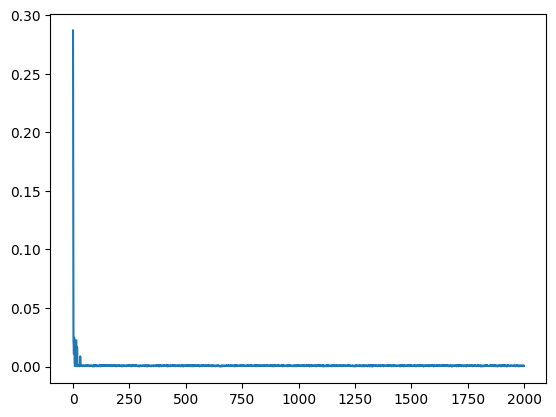

In [20]:
plt.plot(loss)

nsteps = 43
nsteps = 47
nsteps = 29
nsteps = 44
nsteps = 47
nsteps = 39
nsteps = 44
nsteps = 45
nsteps = 39
nsteps = 43
nsteps = 45
nsteps = 44
nsteps = 29
nsteps = 40
nsteps = 36
nsteps = 37
nsteps = 45
nsteps = 39
nsteps = 40
nsteps = 44
nsteps = 30
nsteps = 29
nsteps = 41
nsteps = 36
nsteps = 37
nsteps = 38
nsteps = 44
nsteps = 39
nsteps = 37
nsteps = 50
nsteps = 33
nsteps = 42
nsteps = 38
nsteps = 43
nsteps = 47
nsteps = 37
nsteps = 38
nsteps = 39
nsteps = 44
nsteps = 42
nsteps = 32
nsteps = 44
nsteps = 26
nsteps = 40
nsteps = 42
nsteps = 46
nsteps = 40
nsteps = 30
nsteps = 38
nsteps = 41


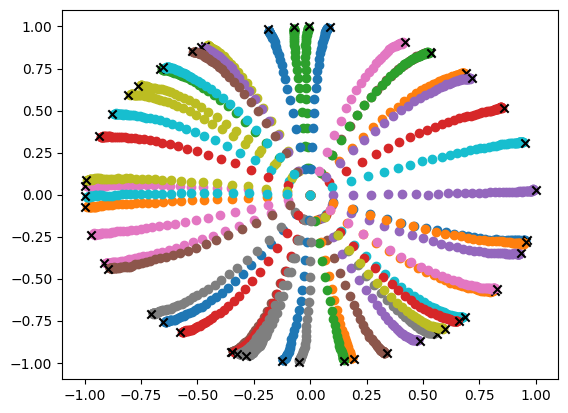

In [22]:
from training import simulate_trial

maxT = 2000
W_untr = np.zeros_like(W_pol)
for seed in range(50):
    tgt, traj, u = simulate_trial(A, B, W_dec, W_pol, maxT=maxT, seed=seed, tol=.01, sigma_u=.1)

    nsteps = maxT - np.isnan(traj[:, 0]).sum()

    print(f'nsteps = {nsteps}')

    plt.scatter(traj[:, 0], traj[:, 1], )
    plt.scatter(tgt[0], tgt[1], marker='x', color='k')

In [17]:
J.shape

(2, 21)